# NLP Core 4 Exercise: Colorful Word Embeddings

<b>In this exercise, we will deepen our knowledge of **word embedding vectors** by using them in practice to group hundreds of words based on their meanings.</b>

## Part 1: Playing with word vectors

**Let's first load a word embedding model with Gensim's downloader API:**

**sourse link:**<br>https://radimrehurek.com/gensim/downloader.html<br>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
import gensim.downloader as api
model = api.load('glove-wiki-gigaword-200')

**We can then access word embedding vectors with the following syntax:**

In [2]:
model['house']

array([ 4.7641e-01, -5.6269e-04,  4.9202e-02, -7.3879e-01,  3.7132e-02,
       -1.2158e-01, -4.6408e-02,  2.3389e-01,  8.8552e-02,  2.3504e-01,
        4.9984e-01, -2.5752e-02,  8.6279e-01, -5.6084e-01, -1.5898e-02,
        3.8606e-01, -4.0744e-01, -7.8242e-02, -4.9744e-01,  2.3597e-01,
       -2.5095e-01,  2.5800e+00,  2.3732e-01, -1.3906e-01,  3.2639e-01,
       -3.9747e-01, -7.6958e-02, -2.7866e-01,  4.1035e-01,  2.3829e-01,
       -4.1175e-02, -6.7140e-01,  4.4805e-01,  1.9617e-01, -5.8027e-01,
        1.7948e-01, -9.3515e-02, -3.6991e-01,  8.2635e-01,  1.7027e-01,
       -1.0140e-01,  5.4630e-02, -1.8867e-01,  5.2122e-01, -1.5975e-01,
        1.3666e-01,  5.4290e-01,  1.9361e-01, -9.2103e-02,  5.6441e-01,
        1.4980e-02,  1.5426e-01,  4.4921e-01,  2.5681e-01, -3.7364e-02,
       -4.5421e-02,  1.8183e-01, -1.2785e-01, -2.4702e-01,  3.6216e-01,
        5.0130e-01,  2.7318e-01,  1.0898e-01, -2.7041e-01,  3.7572e-01,
       -7.0259e-01, -9.0682e-01, -1.8616e-01, -4.0091e-02,  4.05

### Questions:
####  1. What are the dimensions of the vectors returned by this model?


In [3]:
model['house'].shape

(200,)

####  2. What are the three words most similar to the word *gray* in the model? <br> (Hint: use the function model.most_similar)


In [4]:
model.most_similar('gray')

[('grey', 0.6959412693977356),
 ('brown', 0.6616377830505371),
 ('dark', 0.6586745381355286),
 ('blue', 0.620108425617218),
 ('white', 0.6124200820922852),
 ('black', 0.6027640104293823),
 ('green', 0.5735878944396973),
 ('bright', 0.5720424652099609),
 ('shades', 0.5583994388580322),
 ('pink', 0.5575442910194397)]

#### What are the three most similar words to *kitchen*?

In [5]:
model.most_similar('kitchen')

[('bathroom', 0.6923505067825317),
 ('room', 0.68036949634552),
 ('dining', 0.6487982273101807),
 ('cooking', 0.6328619718551636),
 ('kitchens', 0.6295117139816284),
 ('upstairs', 0.6065464615821838),
 ('basement', 0.587793231010437),
 ('bedroom', 0.5805963277816772),
 ('rooms', 0.5776903629302979),
 ('restaurant', 0.5775762796401978)]

####  3. What is an example of two words that are very dissimilar from one another in the model?<br> (use the function model.similarity)

In [6]:
model.similarity('internet','ant')

-0.037599422

<b>We discussed in class how **word analogies** (e.g. king-queen=waiter-waitress) can be reflected by adding and subtracting word vectors. Consider the following code:</b>

In [7]:
model.most_similar(positive = ['cow', 'pork'], negative = ['beef'], topn = 3)

[('pig', 0.6433343887329102),
 ('hog', 0.5722268223762512),
 ('pigs', 0.5682295560836792)]

### Questions:
####  4. What do you think the arguments *positive=* and *negative=* mean above? 

**source link:**<br>https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html

`Positive` words contribute positively towards the similarity, `negative` words negatively.





#### What kind of word analogy does this give us?


`model.most_similar()` computes `cosine similarity` between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. <br>The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

####  5. Find another example of a word analogy using the most_similar function.

In [8]:
model.most_similar(positive = ['yellow', 'banana'], negative = ['island'], topn = 3)


[('purple', 0.5424436330795288),
 ('colored', 0.5115215182304382),
 ('pink', 0.5049728155136108)]

## Part 2: Coloring Words

**For this exercise, we will be analyzing the list of words in the attached file *mixed_words.txt*.**

### Questions:
####  6. Look through the list of words. 

In [9]:
list_of_words = [l.rstrip() for l in open('mixed_words.txt')]
list_of_words

['conjunction',
 'individualism',
 'walnut',
 'green',
 'coffee',
 'thesis',
 'pemmican',
 'precinct',
 'sulfur',
 'stew',
 'tawny',
 'dandelion',
 'jam',
 'grape',
 'synthesis',
 'plum',
 'orange',
 'or',
 'weaker',
 'context',
 'obverse',
 'brass',
 'tamale',
 'mustard',
 'completeness',
 'oak',
 'postulate',
 'tofu',
 'khaki',
 'plod',
 'extension',
 'icing',
 'free',
 'paradox',
 'cookie',
 'sepia',
 'medium',
 'metaphysics',
 'eggshell',
 'structure',
 'tacit',
 'denial',
 'mauve',
 'inconsistency',
 'logic',
 'coral',
 'bone',
 'ivory',
 'russet',
 'attribute',
 'oatmeal',
 'lavender',
 'magenta',
 'solve',
 'obsidian',
 'sound',
 'saffron',
 'buff',
 'member',
 'grits',
 'spaghetti',
 'sand',
 'coop',
 'snag',
 'limit',
 'argument',
 'figure',
 'caviar',
 'stronger',
 'derive',
 'jerky',
 'maximal',
 'yellow',
 'distributive',
 'kedgeree',
 'shadow',
 'tempeh',
 'marmalade',
 'rundown',
 'garnet',
 'innuendo',
 'tableau',
 'proposition',
 'book',
 'axiom',
 'charcoal',
 'particu

#### Do you see any patterns?

Yes, there are visible patterns: words can be splitted into some groups by meaning

 #### What topics do you think are covered by these words?


Food, colors, science, maybe social rules or behavior

####  7. Load the words into a Python array. 

In [10]:
words_in_model = [word for word in list_of_words if word  in model.vocab.keys()]
words_in_model

['conjunction',
 'individualism',
 'walnut',
 'green',
 'coffee',
 'thesis',
 'pemmican',
 'precinct',
 'sulfur',
 'stew',
 'tawny',
 'dandelion',
 'jam',
 'grape',
 'synthesis',
 'plum',
 'orange',
 'or',
 'weaker',
 'context',
 'obverse',
 'brass',
 'tamale',
 'mustard',
 'completeness',
 'oak',
 'postulate',
 'tofu',
 'khaki',
 'plod',
 'extension',
 'icing',
 'free',
 'paradox',
 'cookie',
 'sepia',
 'medium',
 'metaphysics',
 'eggshell',
 'structure',
 'tacit',
 'denial',
 'mauve',
 'inconsistency',
 'logic',
 'coral',
 'bone',
 'ivory',
 'russet',
 'attribute',
 'oatmeal',
 'lavender',
 'magenta',
 'solve',
 'obsidian',
 'sound',
 'saffron',
 'buff',
 'member',
 'grits',
 'spaghetti',
 'sand',
 'coop',
 'snag',
 'limit',
 'argument',
 'figure',
 'caviar',
 'stronger',
 'derive',
 'jerky',
 'maximal',
 'yellow',
 'distributive',
 'shadow',
 'tempeh',
 'marmalade',
 'rundown',
 'garnet',
 'innuendo',
 'tableau',
 'proposition',
 'book',
 'axiom',
 'charcoal',
 'particular',
 'biscu

#### How many of the words are found in our word embedding model? 

In [11]:
len(list_of_words) - (len(list_of_words) - len(words_in_model))

321

#### What word(s) are missing?


In [12]:
[word for word in list_of_words if word not in model.vocab.keys()][0]

'kedgeree'

####  8. Make a matrix X whose rows are the word embedding vectors for each word in the model. <br>(Hint: You can call model[ list ] for a list of words.) 

In [13]:
list_of_words.remove('kedgeree')
X = model[list_of_words]
X

array([[-0.31742  ,  0.079114 ,  0.19231  , ..., -0.24894  ,  0.0099894,
        -0.030023 ],
       [-0.074845 ,  0.26788  ,  0.38795  , ...,  0.1644   , -0.62155  ,
         0.29301  ],
       [ 0.26217  , -0.39454  ,  0.37645  , ..., -0.025546 ,  0.092821 ,
        -0.0097556],
       ...,
       [ 0.39508  , -0.18776  ,  0.21796  , ...,  0.57904  ,  0.21107  ,
         0.60844  ],
       [-0.15091  , -0.14057  ,  0.4281   , ..., -0.26067  , -0.21692  ,
        -0.091401 ],
       [-0.088795 ,  0.4297   , -0.33726  , ...,  0.016686 ,  0.15906  ,
         0.76135  ]], dtype=float32)

#### What are the dimensions of this matrix?


In [14]:
X.shape

(321, 200)

####  9. Cluster the words by using sklearn.cluster.KMeans with n_clusters = 2, fitting it to the matrix X, and save the predicted labels in a variable called *labels*. 

In [15]:
k_means = KMeans(n_clusters=2, random_state=0) 
pred = k_means.fit_predict(X)
labels = k_means.labels_


#### What are some examples of words in each cluster?

In [16]:
cluster = pd.DataFrame({'list_of_words':list_of_words, 'labels':labels})

cluster[cluster['labels'] ==1]

list_of_words  labels
2          walnut       1
3           green       1
4          coffee       1
6        pemmican       1
8          sulfur       1
..            ...     ...
309          jade       1
311    commissary       1
314      buckskin       1
315           mee       1
319     pistachio       1

[165 rows x 2 columns]

In [17]:
cluster[cluster['labels'] ==0]

list_of_words  labels
0      conjunction       0
1    individualism       0
5           thesis       0
7         precinct       0
14       synthesis       0
..             ...     ...
313      operation       0
316   distribution       0
317     connective       0
318        convert       0
320          bound       0

[156 rows x 2 columns]

**Now let's use PCA to project our data points onto two dimensions and visualize them. The colors displayed correspond to the k-means clusters:**

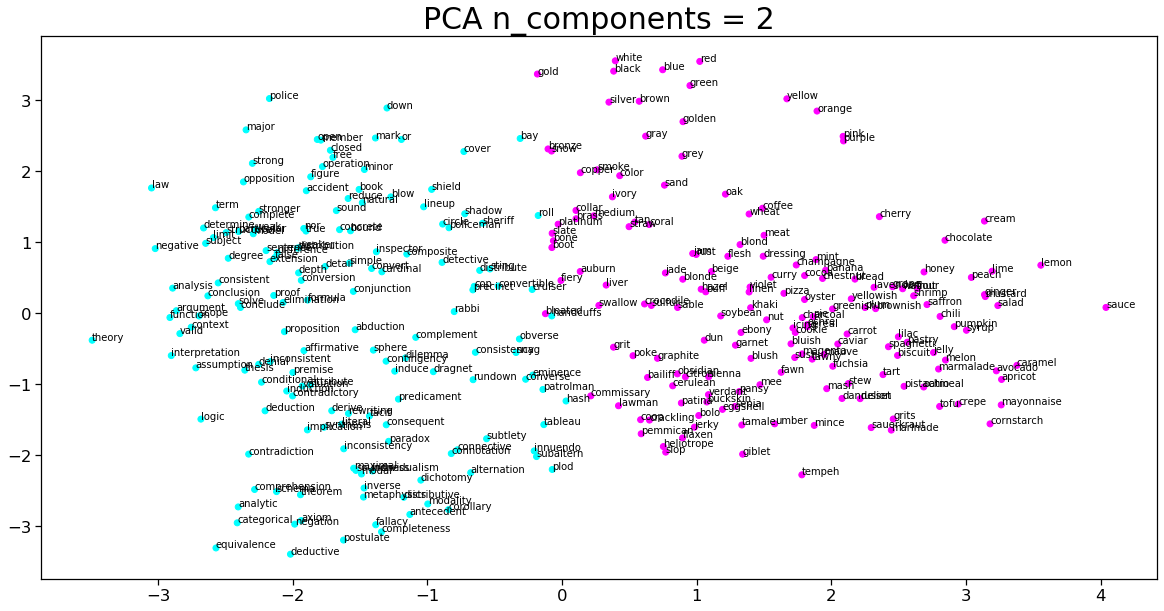

In [18]:

pca = PCA(n_components = 2)
Y = pca.fit_transform(X)
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
for i, word in enumerate(words_in_model):
    ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))
plt.title('PCA n_components = 2', fontsize=30);

### Question:
####  10. Try re-running this code with different numbers of k-means clusters. What do you think the right number of clusters should be? 

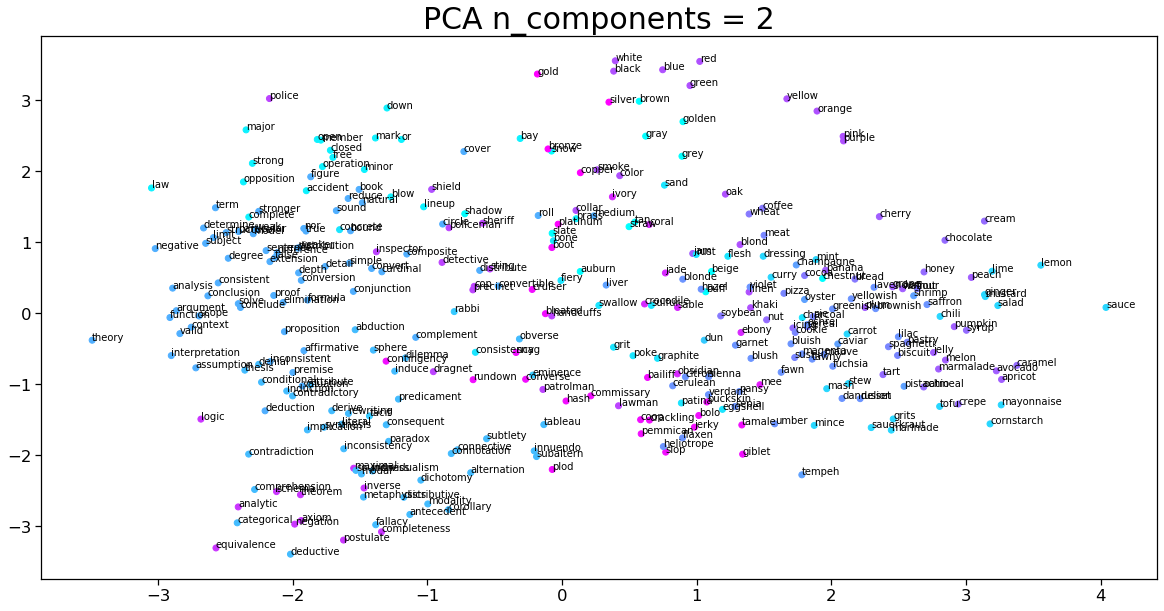

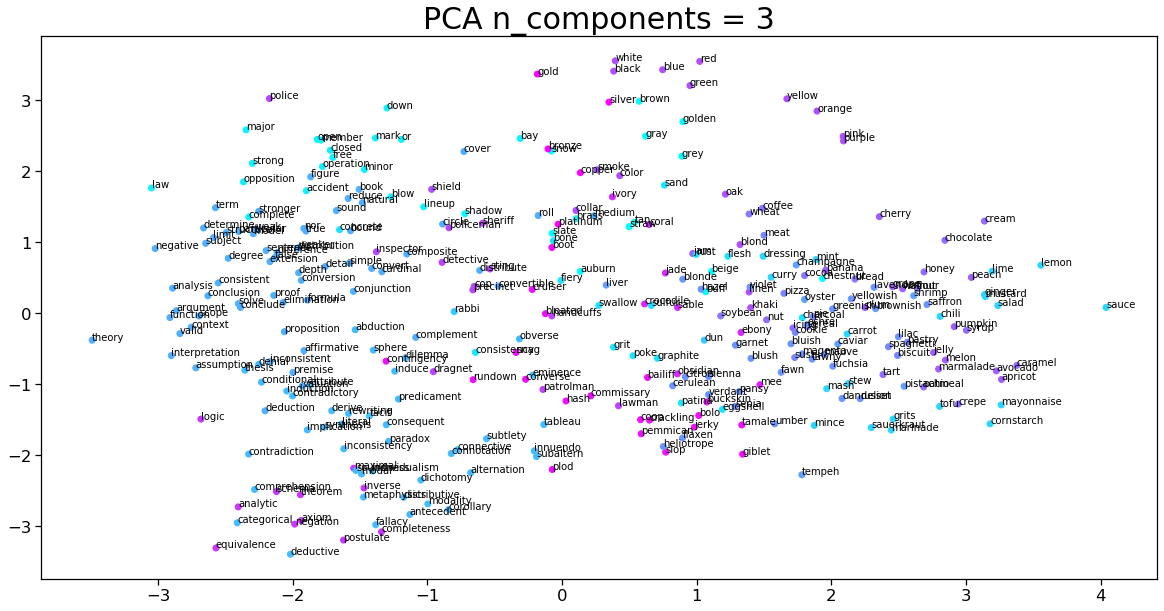

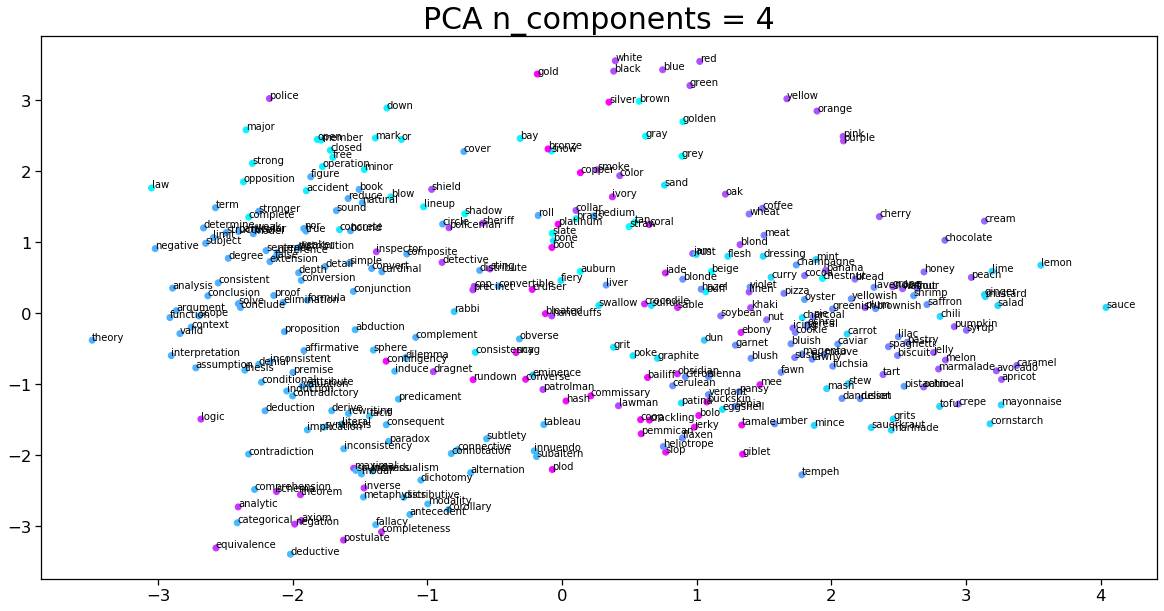

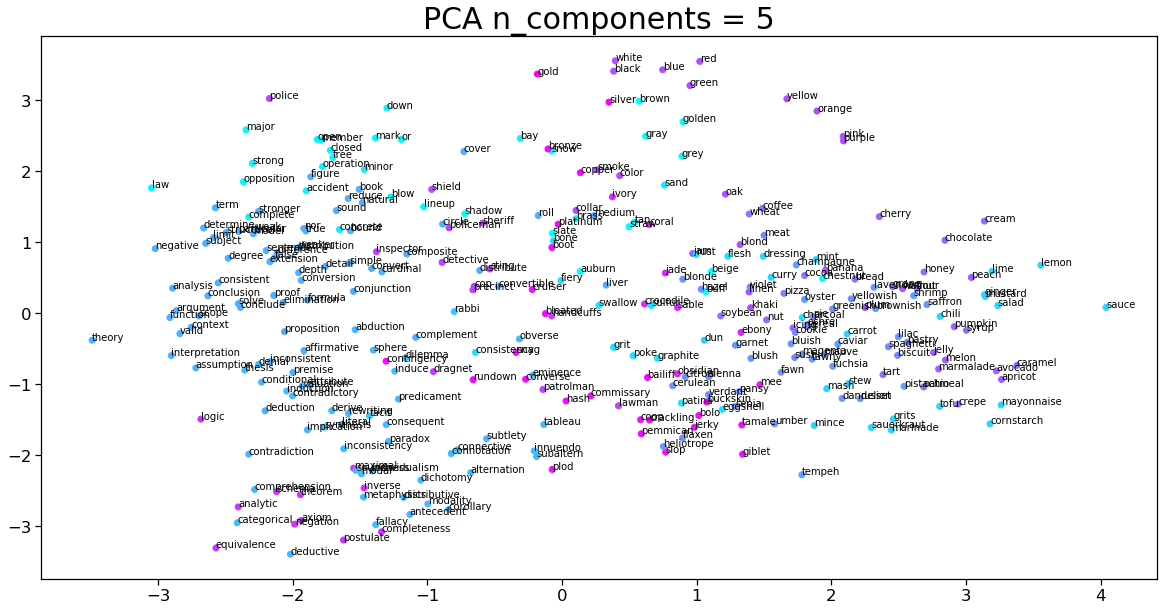

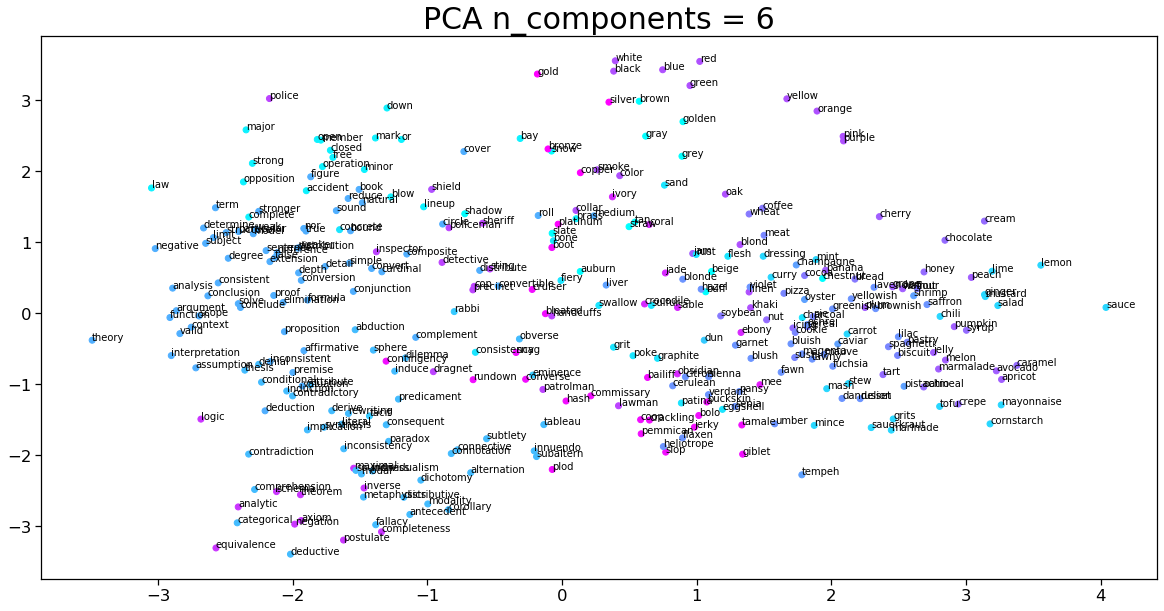

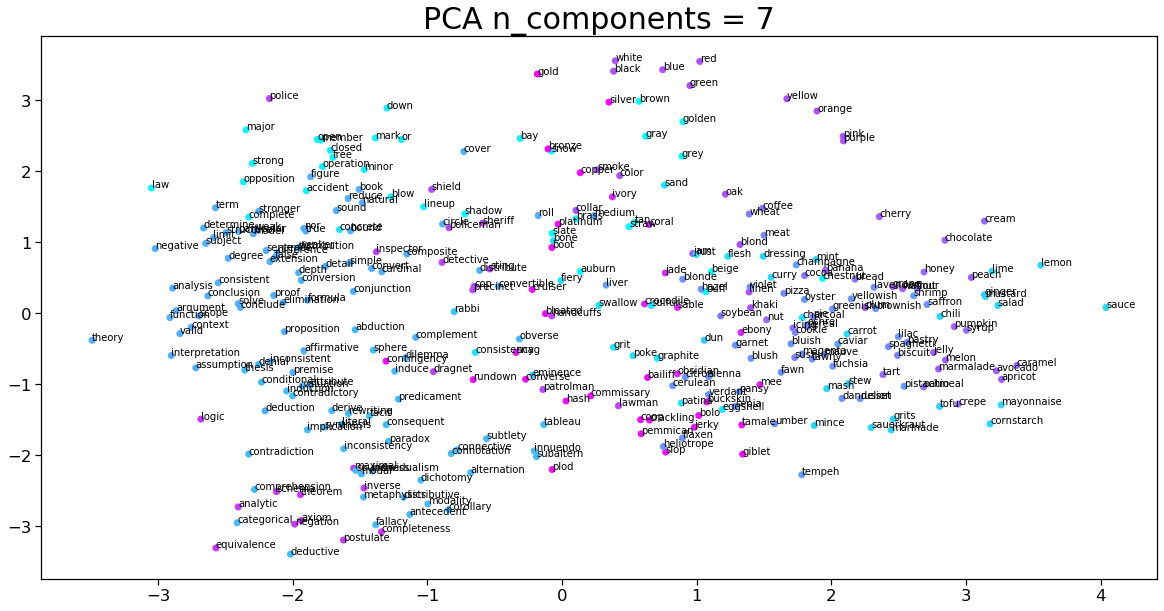

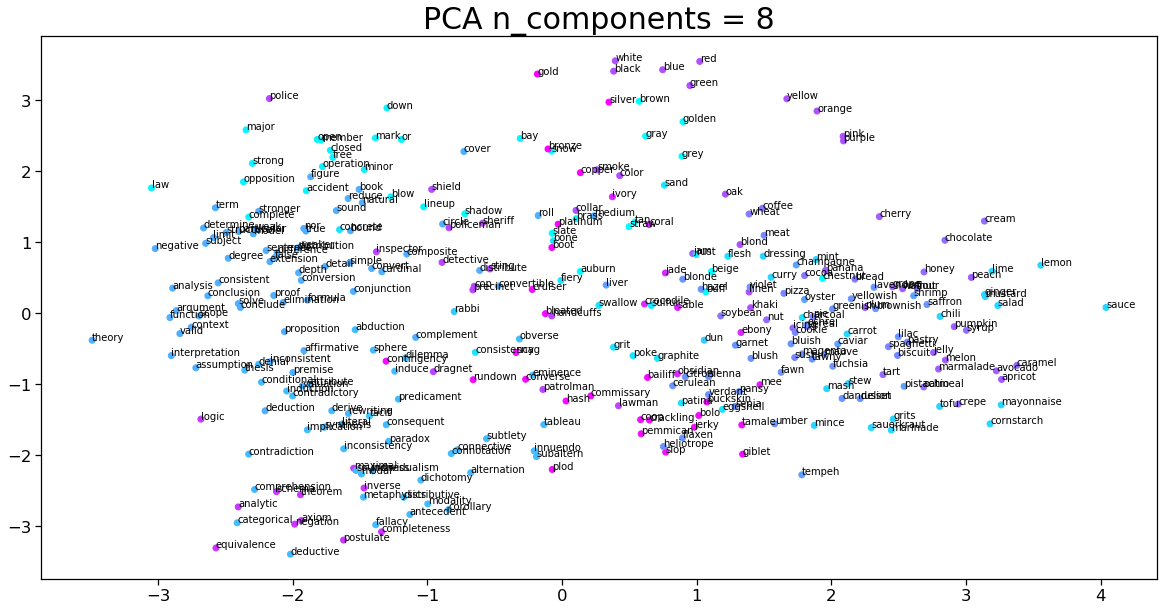

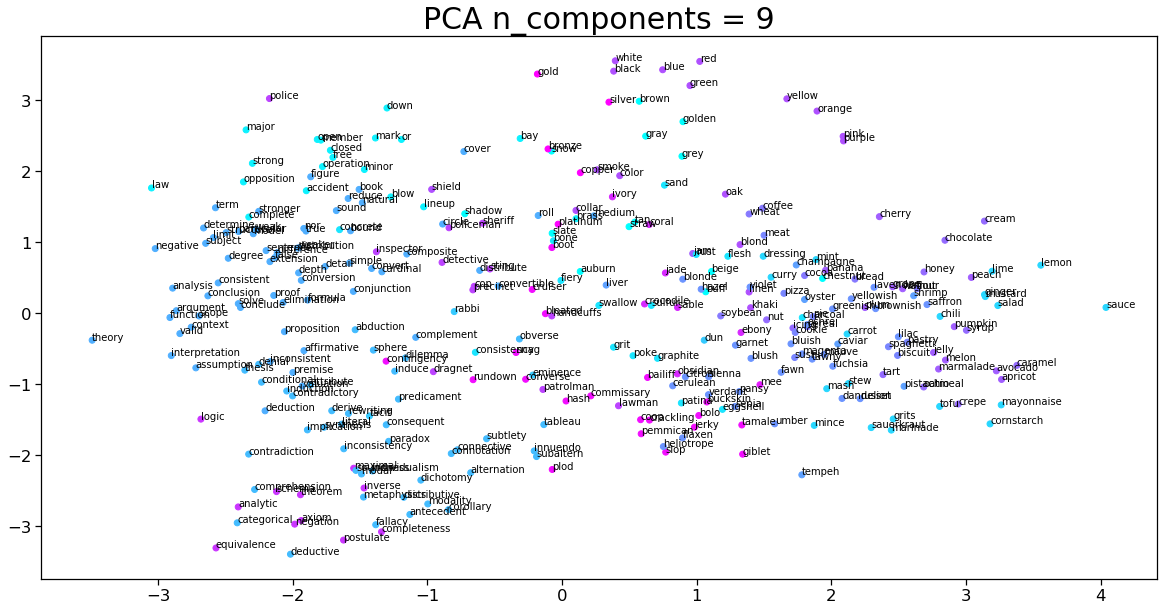

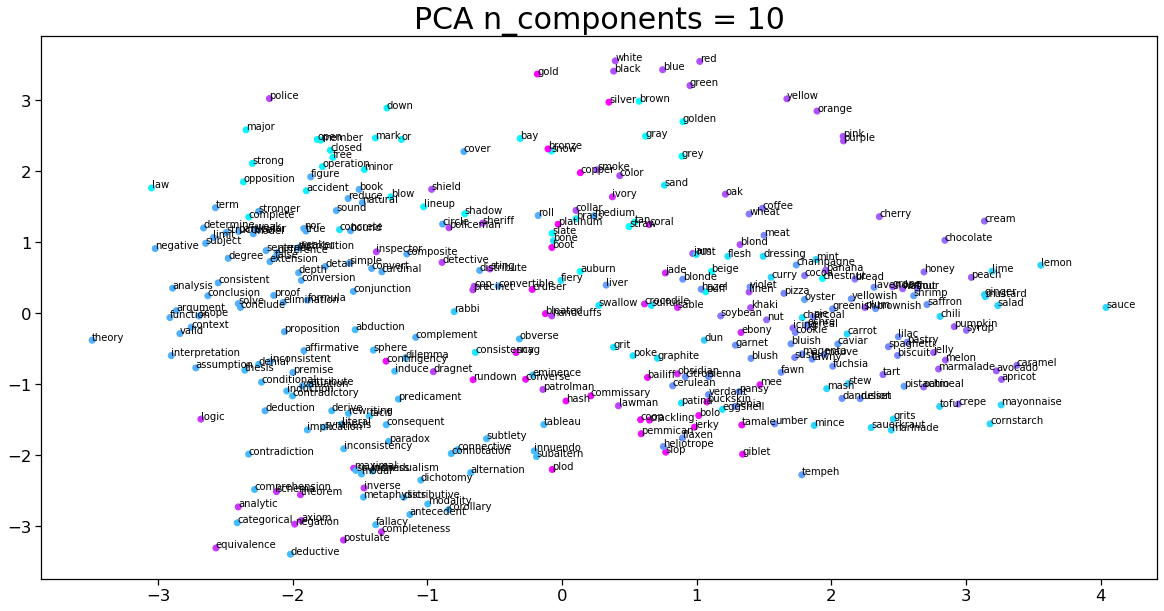

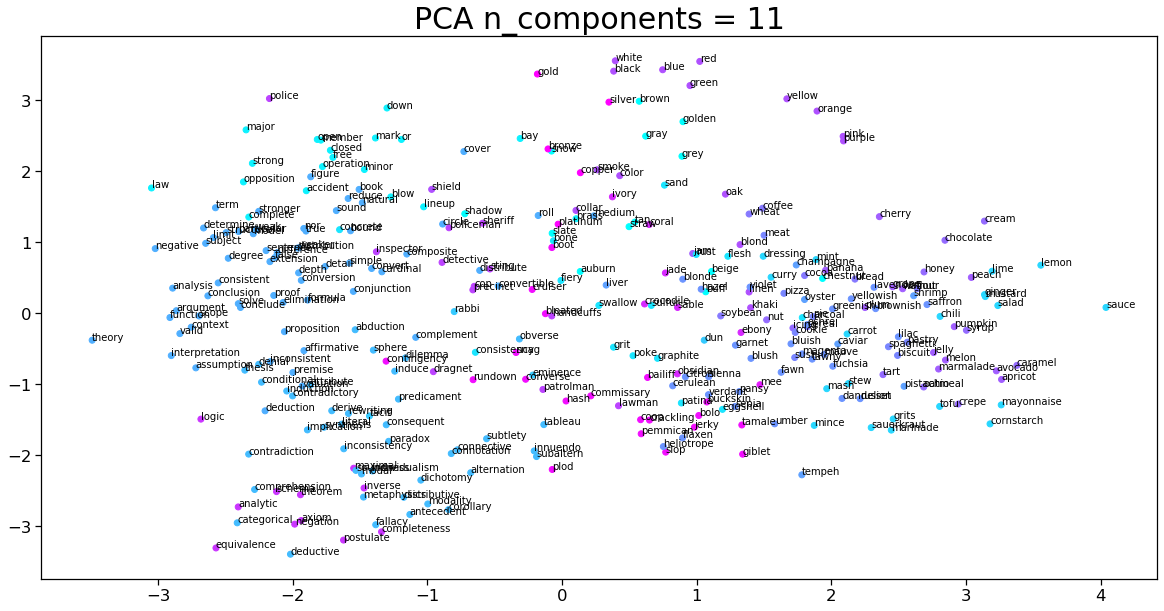

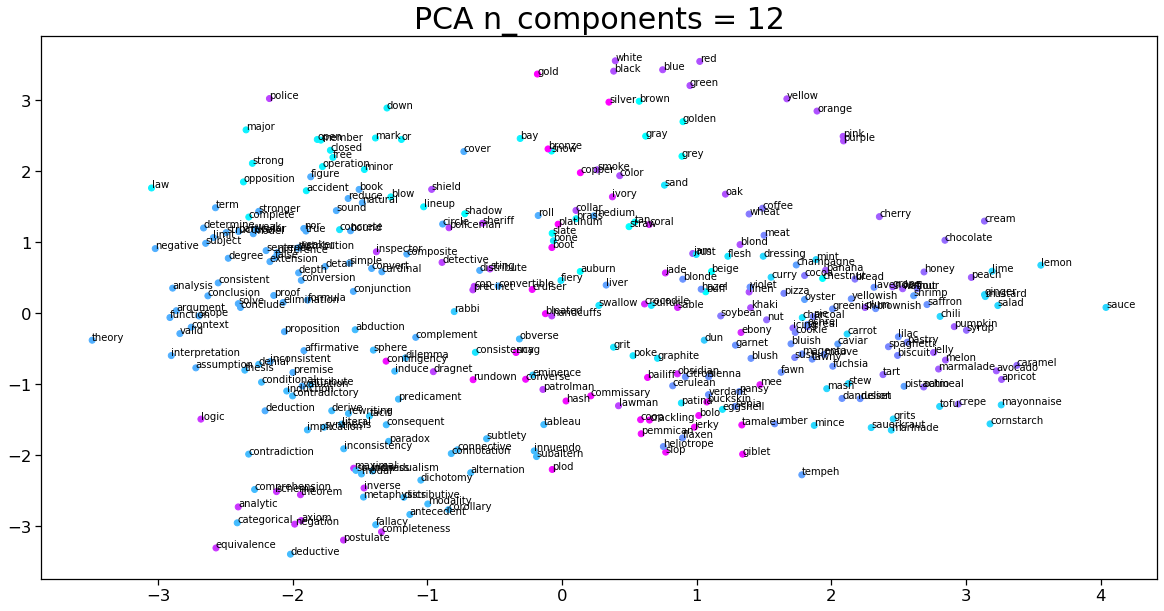

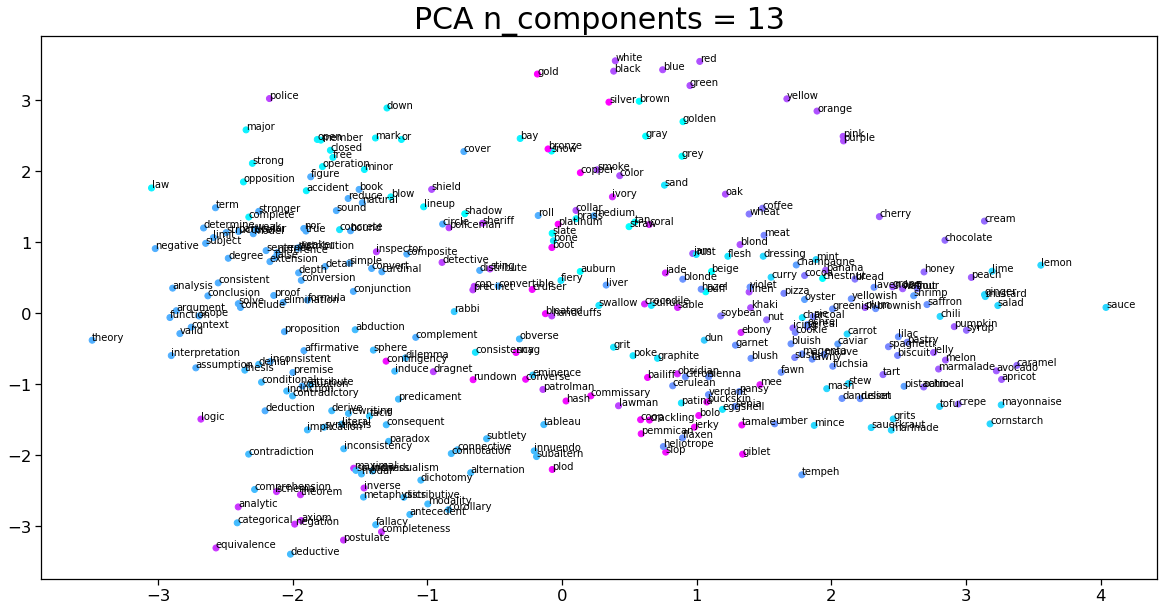

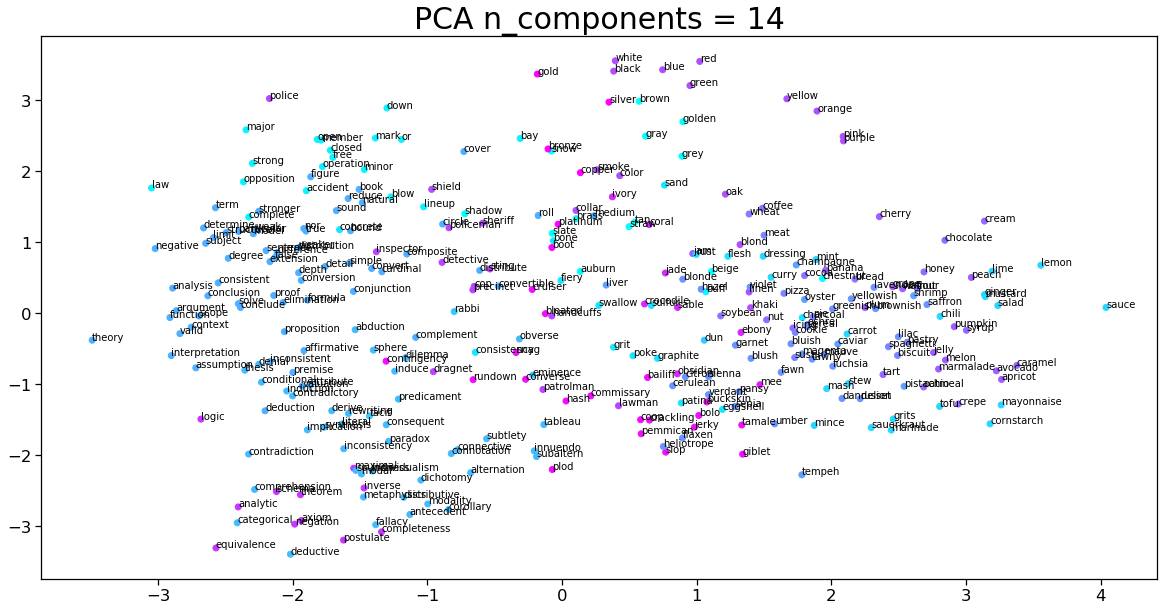

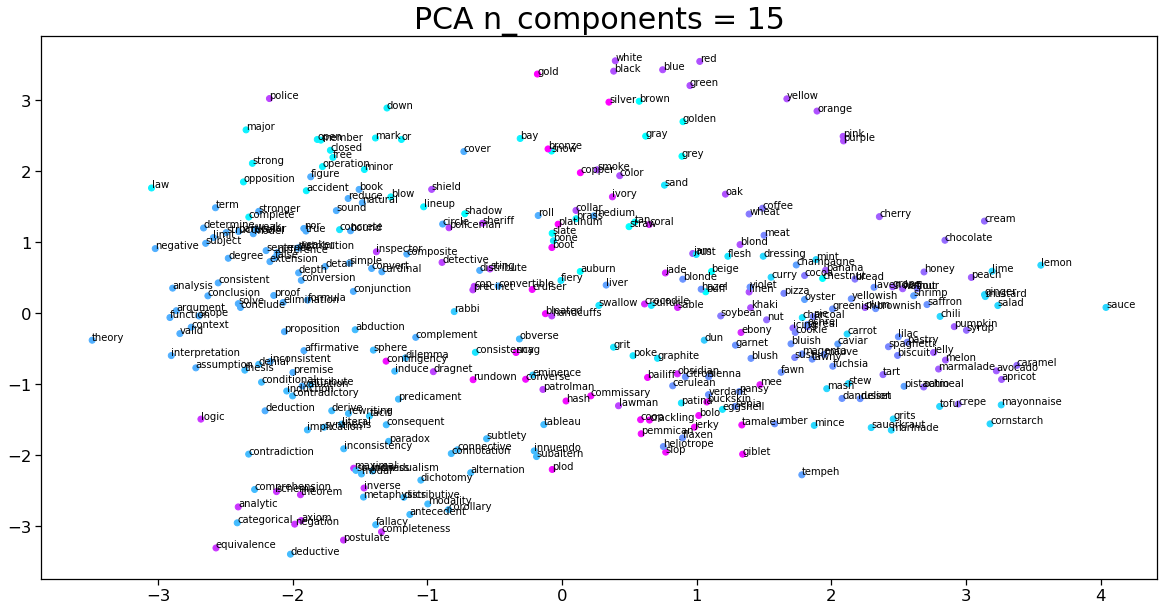

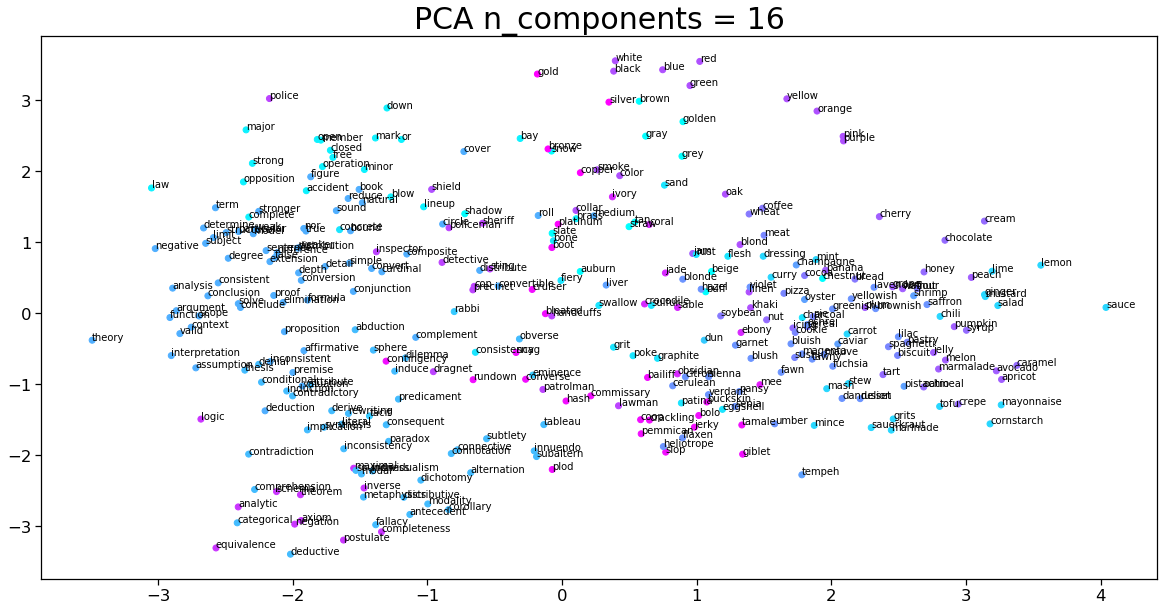

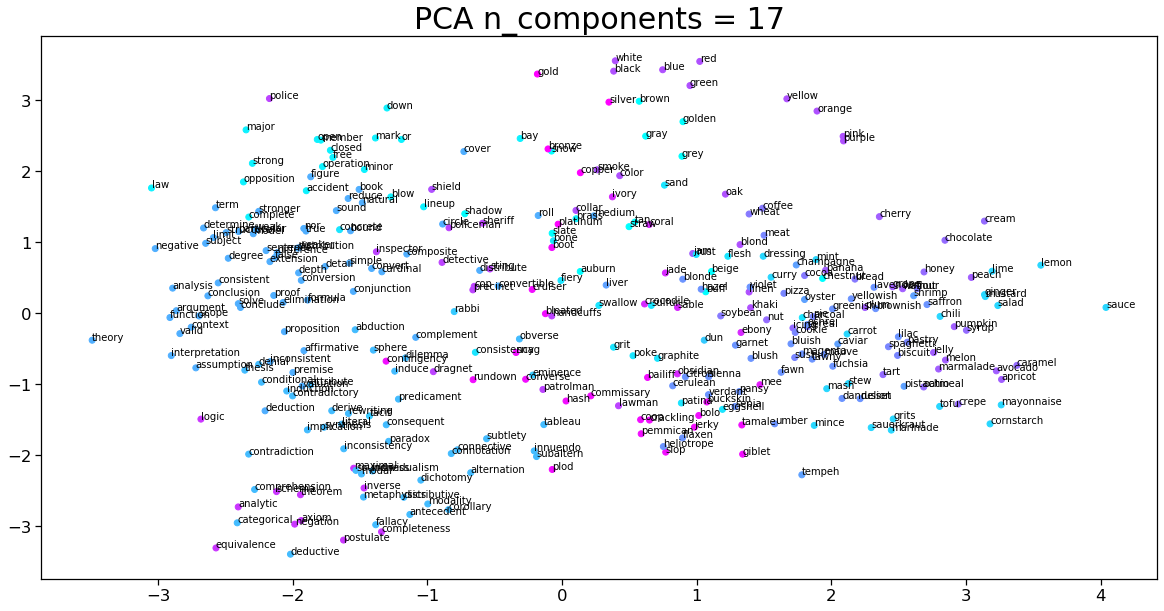

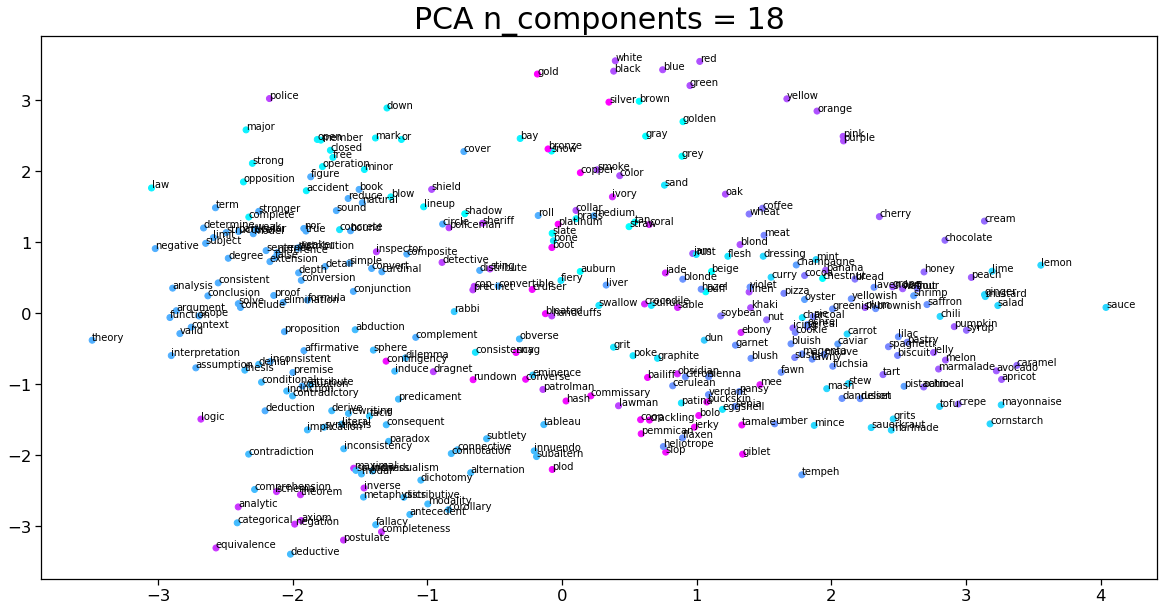

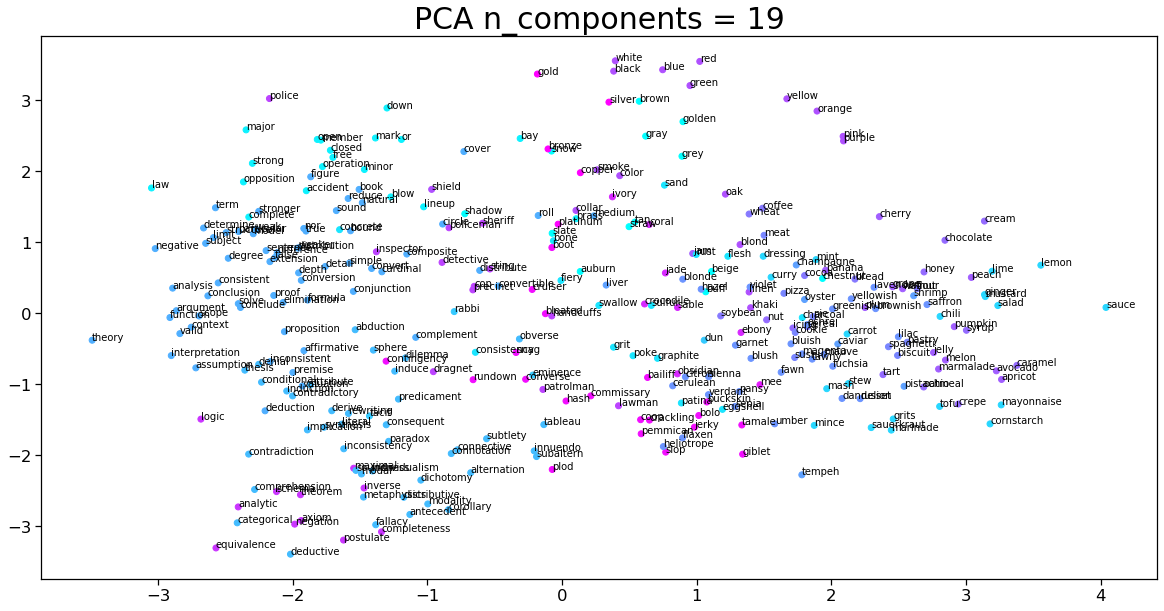

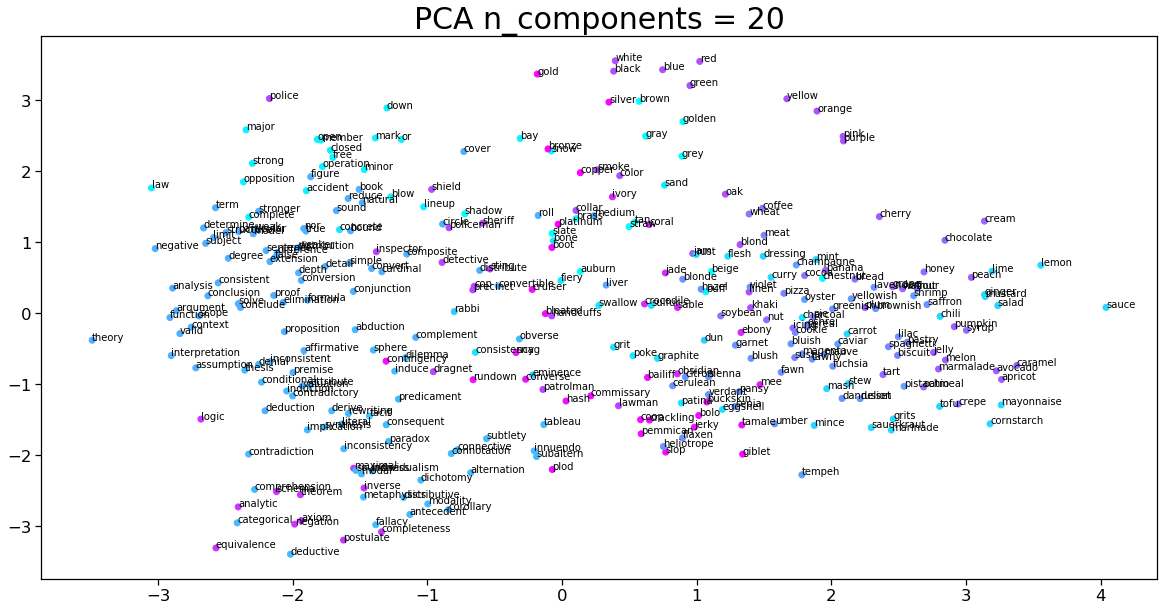

In [21]:
wcss = []
for n_clusters in range(2, 21):
    k_means = KMeans(n_clusters = n_clusters).fit(X)
    wcss.append(k_means.inertia_)
    
    #plot 
    pca = PCA(n_components = n_clusters)
    Y = pca.fit_transform(X)
    fig = plt.figure(figsize = (20, 10))
    ax = fig.add_subplot(111)
    ax.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = pylab.cm.cool)
    for i, word in enumerate(words_in_model):
        ax.annotate(word, xy = (Y[i, 0], Y[i, 1]))
    plt.title(f'PCA n_components = {n_clusters}', fontsize=30);

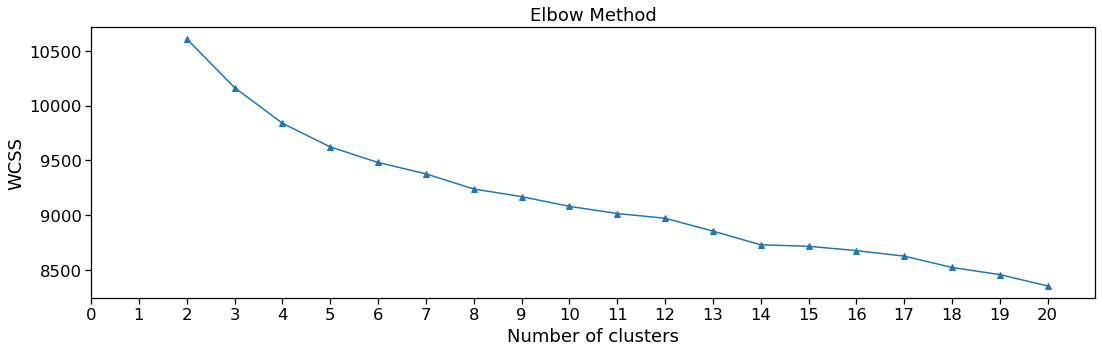

In [22]:
plt.figure(figsize=(18,5))
plt.plot(range(2, 21), wcss,'-^')
plt.xlim(0,21,1)
plt.xticks(range(0,21))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

#### What do the clusters represent?

As we can see on the plot with Elbow method, an optimal number of clusters may be in point 4 (in that point there is the first change in line angle, then it is 8, 13 and 17)

4 clasters may represent that what i wrote in the begining of the task:Food, colors, science, maybe social rules (or behavior)